# Neural Network from Scratch with PyTorch

This notebook demonstrates building a basic neural network using PyTorch, training it with SGD on a dose-effectiveness regression task, and visualizing model predictions before and after training.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

In [ ]:
class BasicNN(nn.Module):
    """
    Handcrafted basic neural network.

    Architecture:
        - 2 input pathways with fixed weights and biases
        - ReLU activations on each pathway
        - Single trainable bias (bfinal) at the output layer
    """

    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        self.w10 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        self.b1 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        self.b2 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        self.bfinal = nn.Parameter(torch.tensor(0.0), requires_grad=True)

    def forward(self, x):
        out_top = F.relu(self.w00 * x + self.b1)
        out_bottom = F.relu(self.w10 * x + self.b2)
        out_after_activation = F.relu(
            self.w01 * out_top + self.w11 * out_bottom + self.bfinal
        )
        return out_after_activation

In [22]:
input_doses= torch.linspace(start=0, end=1, steps=11)

In [23]:
model = BasicNN()

In [24]:
preds = model(input_doses)
preds

tensor([14.5800, 16.0380, 17.4960, 18.9540, 20.4120, 21.8700, 23.3280, 24.7860,
        26.2440, 27.7020, 29.1600], grad_fn=<ReluBackward0>)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Dose')

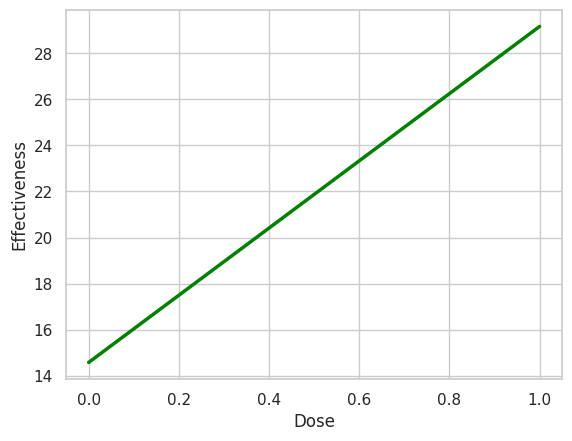

In [27]:
sns.set(style="whitegrid")
sns.lineplot(x=input_doses, y=preds.detach(), color="green", linewidth=2.5)
plt.ylabel("Effectiveness")
plt.xlabel("Dose")

In [32]:
inputs = torch.tensor([0., 0.5, 1])
labels = torch.tensor([0., 1., 0.])

### Training loop

Train the model using SGD to learn the dose-effectiveness mapping: `{0 -> 0, 0.5 -> 1, 1 -> 0}`.

In [44]:
model = BasicNN()
optimizer = SGD(model.parameters(), lr=1e-2)

nb_epoch = 200

for epoch in range(nb_epoch):
    total_loss = 0
    for iteration in range(len(inputs)):
        inputm = inputs[iteration]
        label= labels[iteration]
        loss = (model(inputm) - label) ** 2
        loss.backward()

        total_loss += float(loss)

        optimizer.step()
        optimizer.zero_grad()
    
    if total_loss < 1e-2:
        print(f"Number of steps : {str(epoch)}")
        break

    optimizer.step()
    optimizer.zero_grad()
    if (epoch % 10 == 0):
        print(f"Step {epoch}, total loss : {total_loss}, model bias : {model.bfinal.detach()}")


Step 0, total loss : 1445.838363647461, model bias : -1.272304654121399
Step 10, total loss : 503.7385082244873, model bias : -10.527419090270996
Step 20, total loss : 223.81984329223633, model bias : -15.591766357421875
Step 30, total loss : 118.82380962371826, model bias : -18.737895965576172
Step 40, total loss : 72.14886043965816, model bias : -20.838274002075195
Step 50, total loss : 49.91682815551758, model bias : -22.30582618713379
Step 60, total loss : 33.65726089477539, model bias : -23.559640884399414
Step 70, total loss : 22.80223846435547, model bias : -24.5841007232666
Step 80, total loss : 15.555349349975586, model bias : -25.421157836914062
Step 90, total loss : 10.717249870300293, model bias : -26.1050968170166
Step 100, total loss : 7.487320423126221, model bias : -26.66391944885254
Step 110, total loss : 5.330995082855225, model bias : -27.120519638061523
Step 120, total loss : 3.8914034366607666, model bias : -27.49359703063965
Step 130, total loss : 2.93031704425811

In [42]:
print(f"Final model bias : {model.bfinal}")

Final model bias : Parameter containing:
tensor(-26.6130, requires_grad=True)


In [ ]:
output_doses = model(input_doses)

sns.set(style="whitegrid")
sns.lineplot(x=input_doses, y=output_doses.detach(), color="green", linewidth=2.5)
plt.ylabel("Effectiveness")
plt.xlabel("Dose")

### Tensor dimensionality reference

| Name | Dimensions |
|------|-----------|
| Scalar | 0-dimensional tensor |
| Array / Vector | 1-dimensional tensor |
| Matrix | 2-dimensional tensor |
| n-d Matrix | n-dimensional tensor |